# Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# to show the whole output results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# load data
data = pd.read_csv('../dataset/Bondora_raw.csv', low_memory=False)

In [4]:
# sort data features/columns alphabitcally (just to ease exploration)
data = data.sort_index(axis=1)

# Data Exploration

In [5]:
# show data dimensions
print(data.shape)

(134529, 112)


In [6]:
# show data info (columns' names, data types,...)
print(data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 112 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    ActiveLateCategory                      object 
 1    ActiveLateLastPaymentCategory           object 
 2    ActiveScheduleFirstPaymentReached       bool   
 3    Age                                     int64  
 4    Amount                                  float64
 5    AmountOfPreviousLoansBeforeLoan         float64
 6    ApplicationSignedHour                   int64  
 7    ApplicationSignedWeekday                int64  
 8    AppliedAmount                           float64
 9    BiddingStartedOn                        object 
 10   BidsApi                                 int64  
 11   BidsManual                              float64
 12   BidsPortfolioManager                    int64  
 13   City                                    object 
 14   ContractEndDate   

In [7]:
# show first 5 rows of data
print(data.head())

  ActiveLateCategory ActiveLateLastPaymentCategory  \
0                NaN                           NaN   
1                NaN                           NaN   
2               180+                          180+   
3                NaN                           NaN   
4                NaN                          180+   

   ActiveScheduleFirstPaymentReached  Age    Amount  \
0                               True   61  115.0408   
1                               True   48  140.6057   
2                               True   58  319.5409   
3                               True   23   57.5205   
4                               True   25  319.5436   

   AmountOfPreviousLoansBeforeLoan  ApplicationSignedHour  \
0                          83.0852                     17   
1                         255.6467                     20   
2                           0.0000                     20   
3                         134.2144                     12   
4                         146.9966     

In [8]:
# show data description (count, mean, std, min, max,...) for numerical features
print(data.describe())

                 Age         Amount  AmountOfPreviousLoansBeforeLoan  \
count  134529.000000  134529.000000                    134529.000000   
mean       40.819295    2543.872472                      2868.652401   
std        12.348693    2170.128183                      4507.046575   
min         0.000000       6.390000                         0.000000   
25%        31.000000     744.000000                         0.000000   
50%        40.000000    2125.000000                       396.354100   
75%        50.000000    3600.000000                      4250.000000   
max        77.000000   10632.000000                     53762.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  AppliedAmount  \
count          134529.000000             134529.000000  134529.000000   
mean               13.374640                  3.907908    2727.947540   
std                 4.992375                  1.726192    2374.439168   
min                 0.000000                  1.000000     

In [9]:
# show data unique values counts
print(data.nunique())

ActiveLateCategory                             9
ActiveLateLastPaymentCategory                  9
ActiveScheduleFirstPaymentReached              2
Age                                           62
Amount                                      5223
AmountOfPreviousLoansBeforeLoan            12005
ApplicationSignedHour                         24
ApplicationSignedWeekday                       7
AppliedAmount                                593
BiddingStartedOn                          134135
BidsApi                                     1002
BidsManual                                  4308
BidsPortfolioManager                        5730
City                                        7733
ContractEndDate                             3944
Country                                        4
County                                      1010
CreditScoreEeMini                              7
CreditScoreEsEquifaxRisk                       6
CreditScoreEsMicroL                           11
CreditScoreFiAsiakas

In [10]:
# show data unique values if they are less than 50 values
for column in data:
    unique_count = data[column].nunique()
    if(unique_count <= 50):
        print(unique_count, ' ', column)
        print(data[column].unique())

9   ActiveLateCategory
[nan '180+' '16-30' '1-7' '31-60' '8-15' '121-150' '91-120' '151-180'
 '61-90']
9   ActiveLateLastPaymentCategory
[nan '180+' '151-180' '31-60' '8-15' '1-7' '91-120' '16-30' '121-150'
 '61-90']
2   ActiveScheduleFirstPaymentReached
[ True False]
24   ApplicationSignedHour
[17 20 12 10 16  9 18 22 11 15  0 13 23 19 14  8 21  7  1  2  6  3  5  4]
7   ApplicationSignedWeekday
[5 4 6 7 1 3 2]
4   Country
['EE' 'FI' 'ES' 'SK']
7   CreditScoreEeMini
[  nan 1000.  700.  800.  600.  900.  500.    0.]
6   CreditScoreEsEquifaxRisk
[nan 'A' 'AA' 'B' 'C' 'AAA' 'D']
11   CreditScoreEsMicroL
[nan 'M3' 'M5' 'M1' 'M9' 'M2' 'M6' 'M4' 'M8' 'M7' 'M10' 'M']
14   CreditScoreFiAsiakasTietoRiskGrade
[nan 'RL2' 'RL1' 'RL4' 'RL3' 'RL0' 'RL5' '2' '1' '3' '4' '5' '6' '7' '8']
7   Education
[ 3.  5.  4.  2.  1.  0. nan -1.]
9   EmploymentDurationCurrentEmployer
['UpTo3Years' 'MoreThan5Years' 'UpTo4Years' 'UpTo2Years' 'UpTo1Year' nan
 'UpTo5Years' 'TrialPeriod' 'Other' 'Retiree']
7   Employm

In [11]:
# show data null counts
print(data.isnull().sum())

ActiveLateCategory                         86011
ActiveLateLastPaymentCategory              82279
ActiveScheduleFirstPaymentReached              0
Age                                            0
Amount                                         0
AmountOfPreviousLoansBeforeLoan                0
ApplicationSignedHour                          0
ApplicationSignedWeekday                       0
AppliedAmount                                  0
BiddingStartedOn                               0
BidsApi                                        0
BidsManual                                     0
BidsPortfolioManager                           0
City                                        9794
ContractEndDate                            75546
Country                                        0
County                                     36840
CreditScoreEeMini                          62807
CreditScoreEsEquifaxRisk                  122310
CreditScoreEsMicroL                        29574
CreditScoreFiAsiakas

In [12]:
# show data null percentages
print((data.isnull().sum()/data.shape[0])*100)

ActiveLateCategory                        63.934914
ActiveLateLastPaymentCategory             61.160791
ActiveScheduleFirstPaymentReached          0.000000
Age                                        0.000000
Amount                                     0.000000
AmountOfPreviousLoansBeforeLoan            0.000000
ApplicationSignedHour                      0.000000
ApplicationSignedWeekday                   0.000000
AppliedAmount                              0.000000
BiddingStartedOn                           0.000000
BidsApi                                    0.000000
BidsManual                                 0.000000
BidsPortfolioManager                       0.000000
City                                       7.280215
ContractEndDate                           56.155922
Country                                    0.000000
County                                    27.384430
CreditScoreEeMini                         46.686588
CreditScoreEsEquifaxRisk                  90.917200
CreditScoreE

In [13]:
# show data null counts with percentage more than 40%
count=0 
for column in data:
    nulls_percentage = (data[column].isnull().sum()/data.shape[0])*100
    if(nulls_percentage > 40 ):
        print(data[column].dtype,' ', nulls_percentage,'%',' ' ,column)
        count=count +1
print(count) 

object   63.934913661738356 %   ActiveLateCategory
object   61.16079061020301 %   ActiveLateLastPaymentCategory
object   56.15592177151395 %   ContractEndDate
float64   46.68658802191349 %   CreditScoreEeMini
object   90.91720000892 %   CreditScoreEsEquifaxRisk
object   75.82826007775274 %   CreditScoreFiAsiakasTietoRiskGrade
float64   63.934913661738356 %   CurrentDebtDaysPrimary
float64   61.16079061020301 %   CurrentDebtDaysSecondary
object   63.934913661738356 %   DebtOccuredOn
object   61.16079061020301 %   DebtOccuredOnForSecondary
object   68.0998149097964 %   DefaultDate
float64   68.0998149097964 %   EAD1
float64   68.0998149097964 %   EAD2
float64   96.60370626407689 %   EL_V0
float64   90.39463610076638 %   EL_V1
object   73.17307049037754 %   EmploymentPosition
object   86.0342379709951 %   GracePeriodEnd
object   86.0342379709951 %   GracePeriodStart
float64   56.04739498546781 %   InterestAndPenaltyDebtServicingCost
float64   56.04739498546781 %   InterestAndPenaltyWriteO

# Data PreProcessing

## - Drop some features

In [14]:
# drop feature column which has null counts with percentage more than 40%
dropped_nulls_features=[]
for column in data:
    nulls_percentage = (data[column].isnull().sum()/data.shape[0])*100
    if(nulls_percentage > 40):
        dropped_nulls_features.append(column) 
        
new_data = data.drop(dropped_nulls_features, axis=1)

In [15]:
# drop feature that are unique for each row 
dropped_unique_features=['LoanId','LoanNumber']
new_data = new_data.drop(dropped_unique_features, axis=1)

In [16]:
# drop feature that has only one value 
new_data = new_data.drop('ReportAsOfEOD', axis=1)

In [17]:
# drop features that won't affect related to borrower
dropped_non_needed_features=['City','County','DateOfBirth','UserName']
new_data = new_data.drop(dropped_non_needed_features, axis=1)

In [18]:
# drop separated income features as we have a feature for total income
dropped_separated_income_features=['IncomeFromChildSupport','IncomeFromFamilyAllowance','IncomeFromLeavePay','IncomeFromPension','IncomeFromPrincipalEmployer','IncomeFromSocialWelfare','IncomeOther']
new_data = new_data.drop(dropped_separated_income_features, axis=1)

In [19]:
# drop features with date values
dropped_date_features=['BiddingStartedOn','FirstPaymentDate','LastPaymentOn','ListedOnUTC','LoanApplicationStartedDate','LoanDate','MaturityDate_Last','MaturityDate_Original','StageActiveSince']
new_data = new_data.drop(dropped_date_features, axis=1)

In [20]:
# drop features that won't affect
dropped_non_needed_features=['ApplicationSignedHour','ApplicationSignedWeekday','MonthlyPaymentDay','ModelVersion']
new_data = new_data.drop(dropped_non_needed_features, axis=1)

In [21]:
print(new_data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 49 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ActiveScheduleFirstPaymentReached       134529 non-null  bool   
 1   Age                                     134529 non-null  int64  
 2   Amount                                  134529 non-null  float64
 3   AmountOfPreviousLoansBeforeLoan         134529 non-null  float64
 4   AppliedAmount                           134529 non-null  float64
 5   BidsApi                                 134529 non-null  int64  
 6   BidsManual                              134529 non-null  float64
 7   BidsPortfolioManager                    134529 non-null  int64  
 8   Country                                 134529 non-null  object 
 9   CreditScoreEsMicroL                     104955 non-null  object 
 10  DebtToIncome                            1344

## - Handle target feature (Status)

In [22]:
# drop data entries with current loan status
new_data['DefaultDate'] = data['DefaultDate']
new_data = new_data[new_data.Status != 'Current']

In [23]:
# show data dimensions after dropping
print(new_data.shape)

(77394, 50)


In [24]:
# explore Status and DefaultDate
print('Number of null default date: ',new_data['DefaultDate'].isnull().sum())

print('No default date')
null_date_rows = new_data[new_data['DefaultDate'].isnull()]
null_date_status = null_date_rows['Status']
print(null_date_status.value_counts()) 

print('With default date')
null_date_rows = new_data[new_data['DefaultDate'].notnull()]
null_date_status = null_date_rows['Status']
print(null_date_status.value_counts())

Number of null default date:  34600
No default date
Repaid    25939
Late       8661
Name: Status, dtype: int64
With default date
Late      37111
Repaid     5683
Name: Status, dtype: int64


In [25]:
# if no available default date, then the loan is not default
new_data['Status'] = new_data['DefaultDate'].notnull().astype(int)

In [26]:
new_data = new_data.drop('DefaultDate', axis=1)

In [27]:
# show status info after converting
print(new_data['Status'].dtypes)
print(new_data['Status'].head())
print(new_data['Status'].nunique())
print(new_data['Status'].unique())
print(new_data['Status'].isnull().sum())

int32
0    0
1    0
2    1
3    0
4    1
Name: Status, dtype: int32
2
[0 1]
0


## - Numerical to Categorical

In [28]:
# Education
# 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education

new_data['Education'] = new_data['Education'].astype(str)
print(new_data['Education'].unique())

mapping = {'-1.0':'Unknown','0.0':'Unknown','1.0':'Primary education','2.0':'Basic education','3.0':'Vocational education','4.0':'Secondary education','5.0':'Higher education','nan':np.nan}
new_data['Education'] = new_data['Education'].replace(mapping)
print(new_data['Education'].unique())

new_data['Education'].fillna('Unknown',inplace=True)
print(new_data['Education'].unique())

['3.0' '5.0' '4.0' '2.0' '1.0' '0.0' 'nan' '-1.0']
['Vocational education' 'Higher education' 'Secondary education'
 'Basic education' 'Primary education' 'Unknown' nan]
['Vocational education' 'Higher education' 'Secondary education'
 'Basic education' 'Primary education' 'Unknown']


In [29]:
# EmploymentStatus
# 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree

new_data['EmploymentStatus'] = new_data['EmploymentStatus'].astype(str)
print(new_data['EmploymentStatus'].unique())

mapping = {'-1.0':'Unknown','0.0':'Unknown','1.0':'Unemployed','2.0':'Partially employed','3.0':'Fully employed','4.0':'Self-employed','5.0':'Entrepreneur','6.0':'Retiree','nan':np.nan}
new_data['EmploymentStatus'] = new_data['EmploymentStatus'].replace(mapping)
print(new_data['EmploymentStatus'].unique())

new_data['EmploymentStatus'].fillna('Unknown',inplace=True)
print(new_data['EmploymentStatus'].unique())

['3.0' 'nan' '2.0' '4.0' '5.0' '6.0' '0.0' '-1.0']
['Fully employed' nan 'Partially employed' 'Self-employed' 'Entrepreneur'
 'Retiree' 'Unknown']
['Fully employed' 'Unknown' 'Partially employed' 'Self-employed'
 'Entrepreneur' 'Retiree']


In [30]:
# Gender
# 0 Male 1 Woman 2 Undefined
new_data['Gender'] = new_data['Gender'].astype(str)
print(new_data['Gender'].unique())

mapping = {'0.0':'Male','1.0':'Female','2.0':'Undefined','nan':np.nan}
new_data['Gender'] = new_data['Gender'].replace(mapping)
print(new_data['Gender'].unique())

new_data['Gender'].fillna('Undefined',inplace=True)
print(new_data['Gender'].unique())

['1.0' '0.0' '2.0' 'nan']
['Female' 'Male' 'Undefined' nan]
['Female' 'Male' 'Undefined']


In [31]:
# HomeOwnershipType
# 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 
# 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other

new_data['HomeOwnershipType'] = new_data['HomeOwnershipType'].astype(str)
print(new_data['HomeOwnershipType'].unique())

mapping = {'-1.0':'Unknown','0.0': 'Homeless', '1.0': 'Owner', '2.0': 'Living with parents', '3.0': 'Tenant, pre-furnished property',
           '4.0': 'Tenant, unfurnished property', '5.0': 'Council house', '6.0': 'Joint tenant', '7.0': 'Joint ownership', 
           '8.0': 'Mortgage', '9.0': 'Owner with encumbrance', '10.0': 'Other','nan':np.nan}
new_data['HomeOwnershipType'] = new_data['HomeOwnershipType'].replace(mapping)
print(new_data['HomeOwnershipType'].unique())

new_data['HomeOwnershipType'].fillna('Unknown',inplace=True)
print(new_data['HomeOwnershipType'].unique())

['nan' '0.0' '4.0' '2.0' '3.0' '5.0' '1.0' '8.0' '7.0' '6.0' '9.0' '10.0'
 '-1.0']
[nan 'Homeless' 'Tenant, unfurnished property' 'Living with parents'
 'Tenant, pre-furnished property' 'Council house' 'Owner' 'Mortgage'
 'Joint ownership' 'Joint tenant' 'Owner with encumbrance' 'Other'
 'Unknown']
['Unknown' 'Homeless' 'Tenant, unfurnished property' 'Living with parents'
 'Tenant, pre-furnished property' 'Council house' 'Owner' 'Mortgage'
 'Joint ownership' 'Joint tenant' 'Owner with encumbrance' 'Other']


In [32]:
# LanguageCode
# 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian

new_data['LanguageCode'] = new_data['LanguageCode'].astype(str)
print(new_data['LanguageCode'].unique())

mapping = {'1': 'Estonian', '2': 'English', '3': 'Russian','4': 'Finnish', '5': 'German', '6': 'Spanish', '9': 'Slovakian', 
           '7': 'Other', '22': 'Other', '15': 'Other', '10': 'Other', '13': 'Other', '21': 'Other'}
new_data['LanguageCode'] = new_data['LanguageCode'].replace(mapping)
print(new_data['LanguageCode'].unique())


['1' '3' '2' '4' '6' '22' '15' '9' '5' '10' '13' '7' '21']
['Estonian' 'Russian' 'English' 'Finnish' 'Spanish' 'Other' 'Slovakian'
 'German']


In [33]:
# MaritalStatus
# 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow

new_data['MaritalStatus'] = new_data['MaritalStatus'].astype(str)
print(new_data['MaritalStatus'].unique())

mapping = {'-1.0':'Unknown','0.0': 'Unknown', '1.0': 'Married', '2.0': 'Cohabitant', '3.0': 'Single',
           '4.0': 'Divorced', '5.0': 'Widow','nan':np.nan}
new_data['MaritalStatus'] = new_data['MaritalStatus'].replace(mapping)
print(new_data['MaritalStatus'].unique())

new_data['MaritalStatus'].fillna('Unknown',inplace=True)
print(new_data['MaritalStatus'].unique())

['1.0' '4.0' '3.0' '2.0' '5.0' '0.0' 'nan' '-1.0']
['Married' 'Divorced' 'Single' 'Cohabitant' 'Widow' 'Unknown' nan]
['Married' 'Divorced' 'Single' 'Cohabitant' 'Widow' 'Unknown']


In [34]:
# OccupationArea
# 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale
# 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 
# 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 
# 18 Art and entertainment 19 Agriculture, forestry and fishing

new_data['OccupationArea'] = new_data['OccupationArea'].astype(str)
print(new_data['OccupationArea'].unique())

mapping = {'-1.0':'Unknown','0.0': 'Unknown', '1.0': 'Other', '2.0': 'Mining', '3.0': 'Processing', '4.0': 'Energy', '5.0': 'Utilities', 
           '6.0': 'Construction', '7.0': 'Retail and wholesale', '8.0': 'Transport and warehousing', 
           '9.0': 'Hospitality and catering', '10.0': 'Info and telecom', '11.0': 'Finance and insurance', 
           '12.0': 'Real-estate', '13.0': 'Research', '14.0': 'Administrative', '15.0': 'Civil service & military', 
           '16.0': 'Education', '17.0': 'Healthcare and social help', '18.0': 'Art and entertainment', 
           '19.0': 'Agriculture, forestry and fishing','nan':np.nan}
new_data['OccupationArea'] = new_data['OccupationArea'].replace(mapping)
print(new_data['OccupationArea'].unique())

new_data['OccupationArea'].fillna('Unknown',inplace=True)
print(new_data['OccupationArea'].unique())

['7.0' '16.0' '9.0' '1.0' '10.0' '12.0' '8.0' '6.0' '11.0' '17.0' '5.0'
 '4.0' '3.0' '19.0' 'nan' '0.0' '18.0' '15.0' '13.0' '14.0' '2.0' '-1.0']
['Retail and wholesale' 'Education' 'Hospitality and catering' 'Other'
 'Info and telecom' 'Real-estate' 'Transport and warehousing'
 'Construction' 'Finance and insurance' 'Healthcare and social help'
 'Utilities' 'Energy' 'Processing' 'Agriculture, forestry and fishing' nan
 'Unknown' 'Art and entertainment' 'Civil service & military' 'Research'
 'Administrative' 'Mining']
['Retail and wholesale' 'Education' 'Hospitality and catering' 'Other'
 'Info and telecom' 'Real-estate' 'Transport and warehousing'
 'Construction' 'Finance and insurance' 'Healthcare and social help'
 'Utilities' 'Energy' 'Processing' 'Agriculture, forestry and fishing'
 'Unknown' 'Art and entertainment' 'Civil service & military' 'Research'
 'Administrative' 'Mining']


In [35]:
# VerificationType
# 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified

new_data['VerificationType'] = new_data['VerificationType'].astype(str)
print(new_data['VerificationType'].unique())

mapping = {'0.0': 'Not set', '1.0': 'Income unverified', '2.0': 'Income unverified, cross-referenced by phone', '3.0': 'Income verified', '4.0': 'Income and expenses verified','nan':np.nan}
new_data['VerificationType'] = new_data['VerificationType'].replace(mapping)
print(new_data['VerificationType'].unique())

new_data['VerificationType'].fillna('Not set',inplace=True)
print(new_data['VerificationType'].unique())

['2.0' '4.0' '1.0' '3.0' '0.0' 'nan']
['Income unverified, cross-referenced by phone'
 'Income and expenses verified' 'Income unverified' 'Income verified'
 'Not set' nan]
['Income unverified, cross-referenced by phone'
 'Income and expenses verified' 'Income unverified' 'Income verified'
 'Not set']


In [36]:
# UseOfLoan
# 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 
# 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate
# 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 
# 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business

new_data['UseOfLoan'] = new_data['UseOfLoan'].astype(str)
print(new_data['UseOfLoan'].unique())

mapping = {'-1':'Unknown','0': 'Loan consolidation', '1': 'Real estate', '2': 'Home improvement', '3': 'Business', 
           '4': 'Education', '5': 'Travel', '6': 'Vehicle', '7': 'Other', '8': 'Health', 
           '101': 'Working capital financing', '102': 'Purchase of machinery equipment', 
           '103': 'Renovation of real estate', '104': 'Accounts receivable financing', 
           '105': 'Acquisition of means of transport', '106': 'Construction finance', 
           '107': 'Acquisition of stocks', '108': 'Acquisition of real estate', 
           '109': 'Guaranteeing obligation', '110': 'Other business'}
new_data['UseOfLoan'] = new_data['UseOfLoan'].replace(mapping)
print(new_data['UseOfLoan'].unique())

['7' '2' '0' '6' '8' '3' '5' '4' '1' '110' '101' '102' '104' '108' '106'
 '107' '-1']
['Other' 'Home improvement' 'Loan consolidation' 'Vehicle' 'Health'
 'Business' 'Travel' 'Education' 'Real estate' 'Other business'
 'Working capital financing' 'Purchase of machinery equipment'
 'Accounts receivable financing' 'Acquisition of real estate'
 'Construction finance' 'Acquisition of stocks' 'Unknown']


In [37]:
# EmploymentDurationCurrentEmployer

new_data['EmploymentDurationCurrentEmployer'].fillna('Other',inplace=True)
print(new_data['EmploymentDurationCurrentEmployer'].unique())

['UpTo3Years' 'MoreThan5Years' 'UpTo4Years' 'UpTo2Years' 'UpTo1Year'
 'Other' 'UpTo5Years' 'TrialPeriod' 'Retiree']


## - Get columns types

In [38]:
# get numerical features
numerical_columns = []
for column in new_data:
    if(new_data[column].dtype == 'float64' or new_data[column].dtype == 'int64'):
        numerical_columns.append(column)

# get categorical features
categorical_columns = []
for column in new_data:
    if(new_data[column].dtype == 'object'):
        categorical_columns.append(column)  
        
# get boolean features
boolean_columns = []
for column in new_data:
    if(new_data[column].dtype == 'bool'):
        boolean_columns.append(column) 

## - Boolean to integer

In [39]:
# boolean to int
for bool_column in boolean_columns:
    new_data[bool_column] = new_data[bool_column].astype(int)

In [40]:
print(new_data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ActiveScheduleFirstPaymentReached       77394 non-null  int32  
 1   Age                                     77394 non-null  int64  
 2   Amount                                  77394 non-null  float64
 3   AmountOfPreviousLoansBeforeLoan         77394 non-null  float64
 4   AppliedAmount                           77394 non-null  float64
 5   BidsApi                                 77394 non-null  int64  
 6   BidsManual                              77394 non-null  float64
 7   BidsPortfolioManager                    77394 non-null  int64  
 8   Country                                 77394 non-null  object 
 9   CreditScoreEsMicroL                     51208 non-null  object 
 10  DebtToIncome                            77349 non-null  f

## - Handle outliers

In [41]:
# handle outliers using IQR for numerical columns
def outliers_handling(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    lower_range = Q1 - 1.5 * (Q3 - Q1)
    upper_range = Q3 + 1.5 * (Q3 - Q1)
    column = np.where(column > upper_range, upper_range, column)
    column = np.where(column < lower_range, lower_range, column)
    return column

for num_column in numerical_columns:
    new_data[num_column] = outliers_handling(new_data[num_column])

## - Handle missing values

In [42]:
# boolean 
for bol_column in boolean_columns:
    if(new_data[bol_column].isnull().sum()):
        print(bol_column) 

In [43]:
# categorical -> replace with mode
for cat_column in categorical_columns:
    mode_value = new_data[cat_column].mode().values[0]
    new_data[cat_column].fillna(mode_value,inplace=True)

In [44]:
# numerical-> replace with mean
for num_column in numerical_columns:
    mean_value = new_data[num_column].mean()
    new_data[num_column].fillna(mean_value,inplace=True)

In [45]:
print(new_data.isnull().sum())

ActiveScheduleFirstPaymentReached         0
Age                                       0
Amount                                    0
AmountOfPreviousLoansBeforeLoan           0
AppliedAmount                             0
BidsApi                                   0
BidsManual                                0
BidsPortfolioManager                      0
Country                                   0
CreditScoreEsMicroL                       0
DebtToIncome                              0
Education                                 0
EmploymentDurationCurrentEmployer         0
EmploymentStatus                          0
ExistingLiabilities                       0
ExpectedLoss                              0
ExpectedReturn                            0
FreeCash                                  0
Gender                                    0
HomeOwnershipType                         0
IncomeTotal                               0
Interest                                  0
InterestAndPenaltyBalance       

## - Handle duplicates

In [46]:
print(new_data.duplicated().sum())

0


# EDA (Exploratory Data Analysis)

## - Univariate Analysis

In [47]:
for cat_column in categorical_columns:
#     print(new_data[cat_column].value_counts())
    print((new_data[cat_column].value_counts()/new_data.shape[0])*100)
    print('-------------------------')

EE    51.549216
FI    26.716541
ES    21.354369
SK     0.379874
Name: Country, dtype: float64
-------------------------
M      84.506551
M1      5.323410
M5      3.071298
M2      2.089309
M3      1.997571
M4      1.912293
M6      0.718402
M8      0.131793
M9      0.090446
M7      0.089154
M10     0.069773
Name: CreditScoreEsMicroL, dtype: float64
-------------------------
Secondary education     36.898209
Higher education        27.029227
Vocational education    22.297594
Basic education          6.950151
Primary education        6.752461
Unknown                  0.072357
Name: Education, dtype: float64
-------------------------
MoreThan5Years    37.894410
UpTo1Year         18.461379
UpTo5Years        17.801122
UpTo2Years         7.159470
UpTo3Years         5.864796
Retiree            4.320748
UpTo4Years         3.949919
Other              3.748353
TrialPeriod        0.799804
Name: EmploymentDurationCurrentEmployer, dtype: float64
-------------------------
Unknown               57.3765

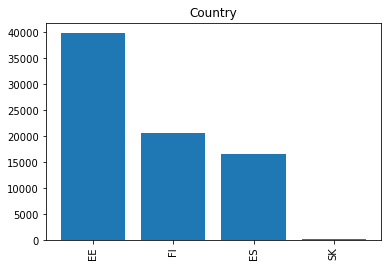

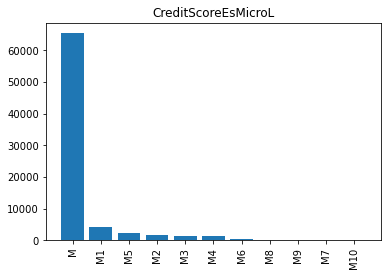

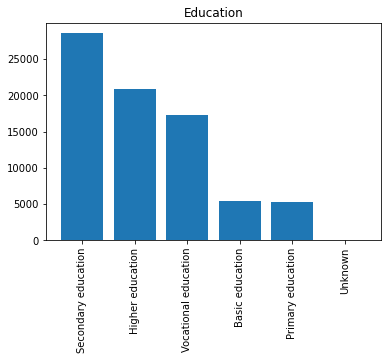

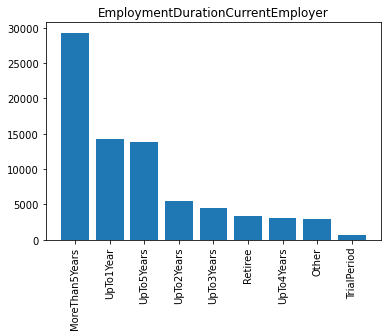

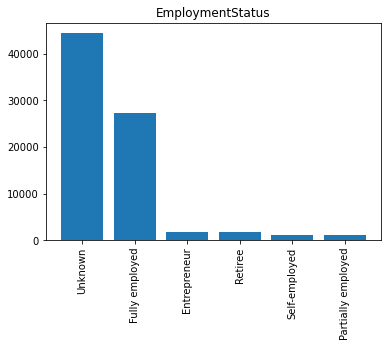

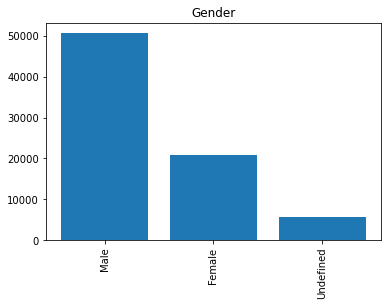

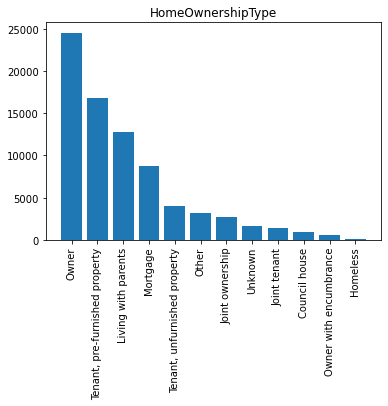

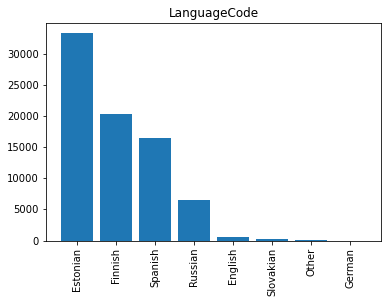

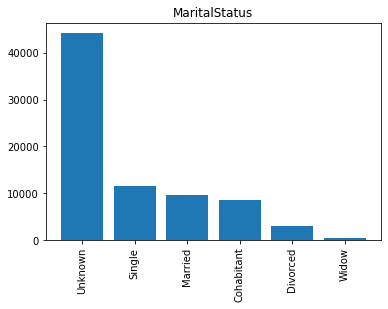

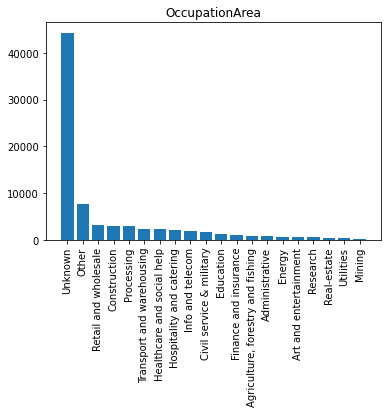

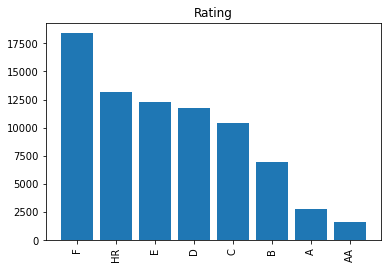

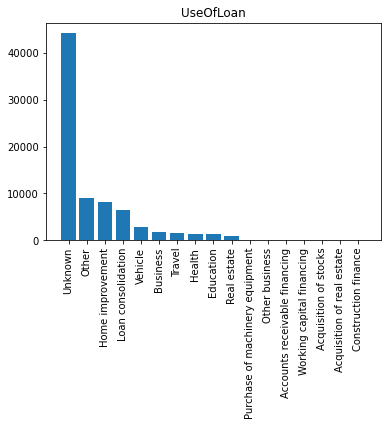

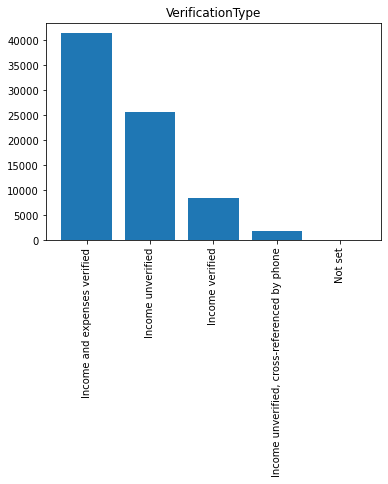

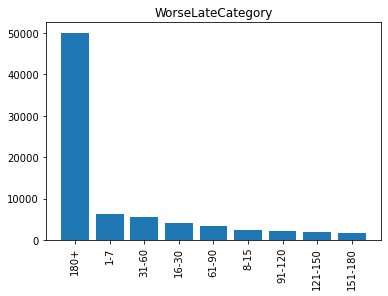

In [48]:
# bar charts for categorical features
for cat_column in categorical_columns:
    fig = plt.figure(figsize=(6, 4))
    plt.bar(new_data[cat_column].value_counts().index,new_data[cat_column].value_counts())
    plt.title(cat_column)
    plt.xticks(rotation=90)
    plt.show()

In [49]:
# -> almost one value is the dominant
# CreditScoreEsMicroL 84%,WorseLateCategory 64% 
# ,OccupationArea 57%,UseOfLoan 57%
dropped_features=['CreditScoreEsMicroL','WorseLateCategory']
new_data = new_data.drop(dropped_features, axis=1)

In [ ]:
# pie charts for boolean features
for bol_column in boolean_columns:
    plt.pie(new_data[bol_column].value_counts(),labels = new_data[bol_column].value_counts().index,autopct='%0.3f%%')
    plt.title(bol_column)
    plt.show()

In [ ]:
# ActiveScheduleFirstPaymentReached -> almost one value is the dominant
dropped_features=['ActiveScheduleFirstPaymentReached']
new_data = new_data.drop(dropped_features, axis=1)

In [ ]:
# pie charts for target feature
plt.pie(new_data['Status'].value_counts(),labels = new_data['Status'].value_counts().index,autopct='%0.3f%%')
plt.title('Status')
plt.show()

In [ ]:
# histograms for numerical features
for num_column in numerical_columns:
    fig = plt.figure(figsize=(6, 4))
    n = plt.hist(new_data[num_column])
    plt.title(num_column)
    
    print(num_column)
    print(n[0])
    print('----------------------------------------------------------')

In [ ]:
# -> most of the data in one range
# NextPaymentNr 77k, PreviousEarlyRepaymentsCountBeforeLoan 77k, RefinanceLiabilities 77k 
# AmountOfPreviousLoansBeforeLoan 47k, BidsApi 52k, DebtToIncome 48k,  FreeCash 49k,
dropped_features=['NextPaymentNr','PreviousEarlyRepaymentsCountBeforeLoan','RefinanceLiabilities']
new_data = new_data.drop(dropped_features, axis=1)

## - Bivariate Analysis

In [ ]:
sns.set(rc = {'figure.figsize':(30,10)})
corr = new_data.corr()
sns.heatmap(corr, annot=True,cmap= 'coolwarm')

In [ ]:
# get correlated features that have correlation value more than a specific threshold
def get_correlated_features(threshold): 
    mat=[]
    for i in range(corr.shape[0]):
        
        correltated_features = [] 
        correltated_features.append(corr.columns[i])
        
        for j in range(i):
            if (abs(corr.iloc[i, j]) >= threshold and abs(corr.iloc[i, j]) < 1):
                correltated_features.append(corr.columns[j])
                
        if(len(correltated_features) > 1):
            mat.append(correltated_features)
    return mat

print(get_correlated_features(0.8))

In [ ]:
# leave one feature from each correlated features lists 
dropped_features=['Amount','ExpectedLoss','AmountOfPreviousLoansBeforeLoan','NewCreditCustomer']
new_data = new_data.drop(dropped_features, axis=1)

In [ ]:
for num_column in numerical_columns:
    
    if num_column in new_data.columns:
        fig=plt.figure(figsize=(6, 4))
        plt.hist(new_data[new_data['Status']==1][num_column],alpha=0.5, color="blue", label="Default")
        plt.hist(new_data[new_data['Status']==0][num_column],alpha=0.5, color="green", label="Not-Default")
        plt.title(num_column)


In [ ]:
print(new_data.info(verbose=True))

# Encoding Categorical Variables

In [ ]:
encoder = LabelEncoder()

for cat_column in categorical_columns:
    if cat_column in new_data.columns:
        new_data[cat_column] = encoder.fit_transform(new_data[cat_column])

# Scaling

In [ ]:
y_target = new_data['Status']
x_data = new_data.drop('Status', axis=1)

In [ ]:
scaler = StandardScaler()
# x_data = scaler.fit_transform(x_data)
x_data_scaled = pd.DataFrame(scaler.fit_transform(x_data), columns = x_data.columns)

In [ ]:
preprocessed_data = pd.concat([y_target, x_data_scaled], axis=1)

# Save pre-processed data

In [ ]:
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

# PCA (Principal Component Analysis)

In [ ]:
print(x_data_scaled.shape)

In [ ]:
pca = PCA(n_components = 10)
x_data_scaled_pca =  pca.fit_transform(x_data_scaled)

In [ ]:
print(x_data_scaled_pca.shape)